In [35]:
#import packages
! python -m pip install fitter
from fitter import Fitter, get_common_distributions, get_distributions
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import date 
import seaborn as sns
from matplotlib import pyplot as plt
import math

**Question 1**

In [16]:
OHCA_df = pd.read_csv('ProjectData-OHCAs.csv', index_col=0)
volunteer_df = pd.read_csv('ProjectData-VolunteerResponses.csv', index_col=0)


#0 for no response, 1 for “yes, they accept the alert” and 2 for “no, they decline the alert”) 
#fraction of volunteers that do not respond to alerts
frac_no_response = volunteer_df['Response'].loc[volunteer_df['Response']==0].count()/len(volunteer_df)
print('Fraction of volunteers that do not respond to alert: ', frac_no_response)

#fraction of volunteers that respond to alert
frac_yes = volunteer_df['Response'].loc[volunteer_df['Response']==1].count()/len(volunteer_df)
print('Fraction of volunteers that accept alert: ', frac_yes)

#fraction of volunteers that decline to alert
frac_no = volunteer_df['Response'].loc[volunteer_df['Response']==2].count()/len(volunteer_df)
print('Fraction of volunteers that decline alert: ', frac_no)


Fraction of volunteers that do not respond to alert:  0.19916828879844276
Fraction of volunteers that accept alert:  0.36170589276234294
Fraction of volunteers that decline alert:  0.4391258184392143


**Question 2**

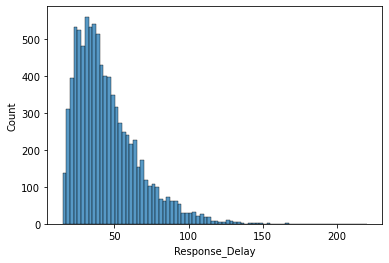

In [49]:
response_df= volunteer_df.loc[volunteer_df['Response']!=0]
sns.histplot(data= response_df, x='Response_Delay')

**Question 3**

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 10.95it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,0.000027,1573.878887,-177663.607962,inf,0.006442,8.443737e-01
lognorm,0.000076,1467.586036,-168339.001158,inf,0.017758,6.554977e-03
beta,0.000330,2018.152777,-154980.128051,inf,0.059924,1.075663e-28
norm,0.001001,2681.083157,-144952.991042,inf,0.098865,1.840534e-77
expon,0.001673,1365.481486,-140308.461369,inf,0.132460,6.098667e-139


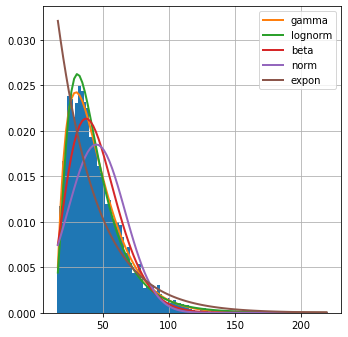

In [68]:
sns.displot(data=response_df, x='Response_Delay', kind='hist', bins=100)
h = response_df['Response_Delay'].values

f = Fitter(h, distributions=dist)
f.fit()
f.summary()

The top three distributions found using fitting packages are : gamma, lognormal, and beta. The domain for each of the three is discussed below

Gamma domain: response delay > 0
Lognormal domain: response delay > 0
Beta domain: response delay lies between 0 and 1

Therefore, both gamma and lognormal distributions are feasible, but since the p-value of the gamma distribution is so much higher, and the test statistic noticably smaller means that the null hypothesis in the k-s fails to be rejected indicating that the values are likely from the same distribution. Therefore, the gamma distribution is determined to be the best fit.